In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
img1 = cv2.imread("../DATA/dog_backpack.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("../DATA/watermark_no_copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

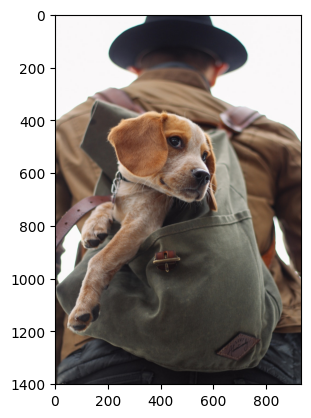

In [6]:
plt.imshow(img1)

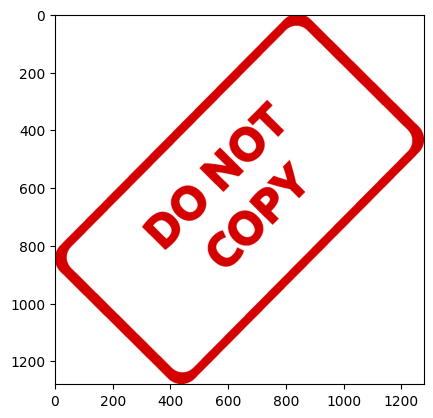

In [7]:
plt.imshow(img2)

In [10]:
print(img1.shape)
print(img2.shape)
#notice they are not the same size, so we need to resize them
img1 = cv2.resize(img1,(1200,1200))
img2 = cv2.resize(img2,(1200,1200))
print("----------After Resize----------")
print(img1.shape)
print(img2.shape)

(1401, 934, 3)
(1280, 1277, 3)
----------After Resize----------
(1200, 1200, 3)
(1200, 1200, 3)


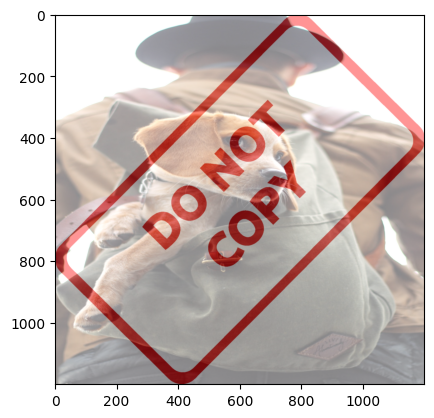

In [17]:
#blend above 2 img
# addWeighted() only works for the img that have the same size
blended = cv2.addWeighted(src1=img1, alpha=0.6, src2=img2,beta=0.5,gamma=0)
plt.imshow(blended)

In [ ]:
#overlay small image over top of a larger img(not blending)
#Numpy reassignment

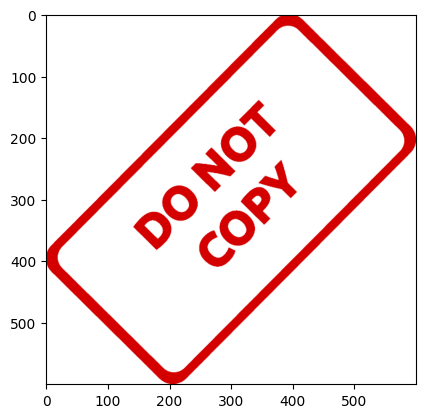

In [19]:
#reload img
img1 = cv2.imread("../DATA/dog_backpack.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("../DATA/watermark_no_copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
#make img2 smaller
img2 = cv2.resize(img2,(600,600))
plt.imshow(img2)

In [21]:
larger_img = img1
smaller_img = img2

In [22]:
#this represent when to start the overlay
x_offset = 0
y_offset = 0

In [23]:
#this is the offset value + img size
print(smaller_img.shape)
x_end = x_offset + smaller_img.shape[1]
y_end = y_offset + smaller_img.shape[0]
#notice that (y: 600, x: 600, color channel: 3)

(600, 600, 3)


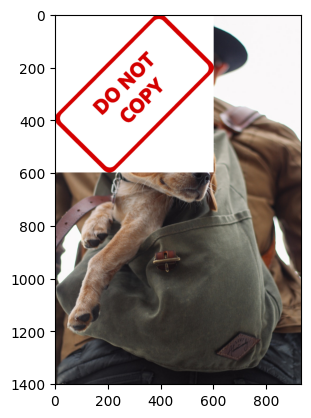

In [25]:
larger_img[y_offset:y_end, x_offset:x_end] = smaller_img
plt.imshow(larger_img)

In [ ]:
#blend together diff img with diff size

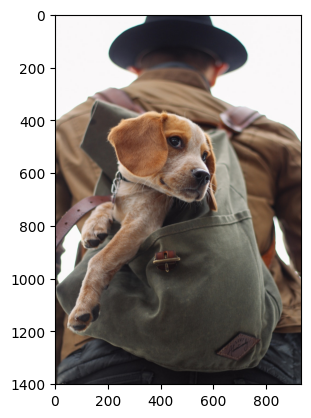

In [28]:
#reload img
img1 = cv2.imread("../DATA/dog_backpack.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("../DATA/watermark_no_copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2,(600,600))
plt.imshow(img1)

In [29]:
print(img1.shape)

(1401, 934, 3)


In [31]:
x_offset = 934 - 600
y_offset = 1401 - 600

In [32]:
rows, columns, channels = img2.shape
print(rows)
print(columns)
print(channels)

600
600
3


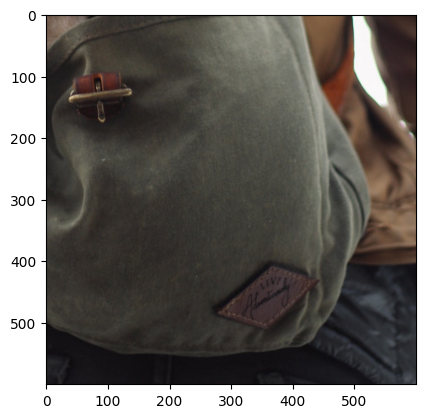

In [33]:
# Region of interest
roi = img1[y_offset:1401,x_offset:934]
plt.imshow(roi)

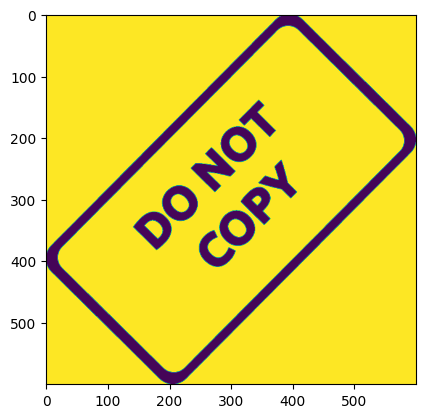

In [34]:
#create a mask to let only the red pass
img2gray = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)
plt.imshow(img2gray)

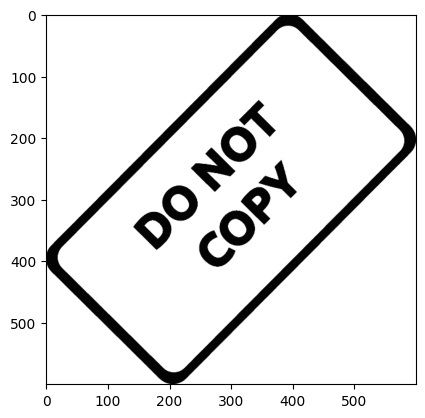

In [35]:
plt.imshow(img2gray,cmap="gray")

(600, 600)


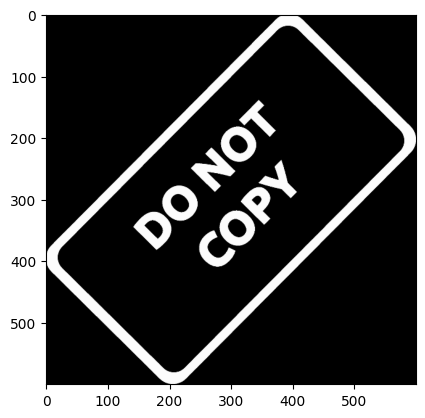

In [39]:
#calculate the inverse of the above img, to create the mask
mask_inv = cv2.bitwise_not(img2gray)
plt.imshow(mask_inv,cmap="gray")
print(mask_inv.shape)
#notice that the mask_inv does not have the color channel, so we need to add it back

(600, 600, 3)


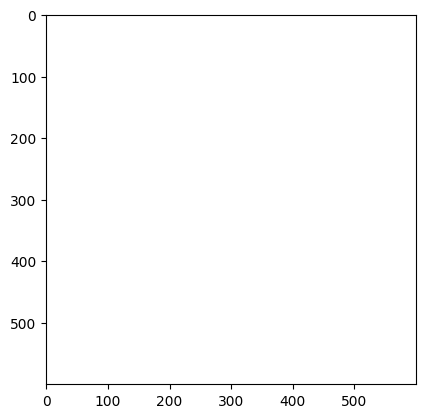

In [41]:
#add back color channel
white_background = np.full(img2.shape,255,dtype=np.uint8) #shape like img2, so x:600, y:600
print(white_background.shape)
plt.imshow(white_background)

(600, 600, 3)


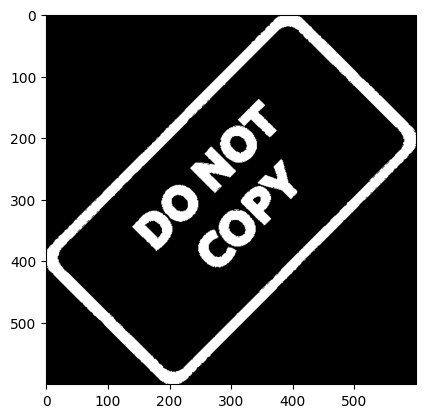

In [45]:
#add the color channel
bk = cv2.bitwise_or(src1=white_background,src2=white_background,mask=mask_inv)
print(bk.shape)
plt.imshow(bk)

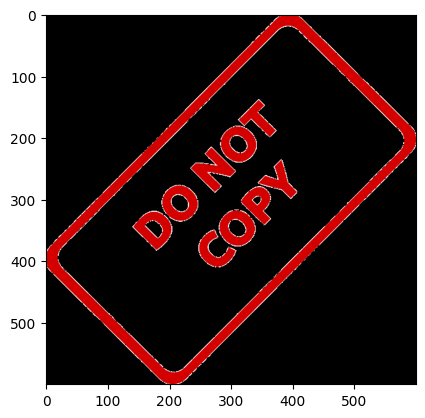

In [46]:
fg = cv2.bitwise_or(src1=img2,src2=img2,mask=mask_inv) 
plt.imshow(fg)

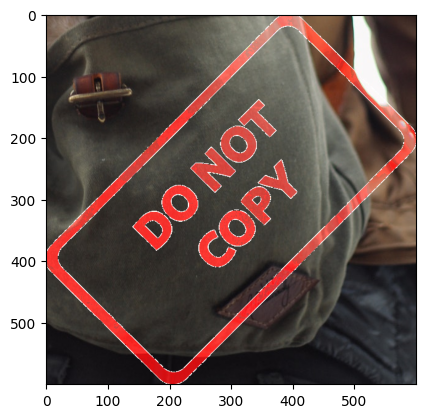

In [47]:
#blend the mask
final_roi = cv2.bitwise_or(src1=roi, src2=fg)
plt.imshow(final_roi)

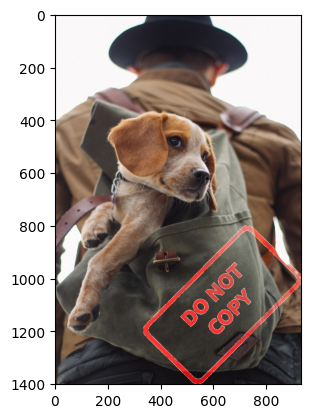

In [49]:
#overlay the img
larger_img = img1
smaller_img = final_roi
larger_img[y_offset:y_offset + smaller_img.shape[0], x_offset:x_offset + smaller_img.shape[1]] = smaller_img
plt.imshow(larger_img)